In [1]:
# import pickle
# #書き込み
# with open('model.pkl', 'wb') as f:
#      pickle.dump(sm, f)
# with open('fit.pkl', 'wb') as g:
#      pickle.dump(fit, g)

In [2]:
# import pickle
# #読み込み
# sm = pickle.load(open('model.pkl', 'rb'))
# fit = pickle.load(open('fit.pkl', 'rb'))

In [1]:
import datetime
from dateutil.relativedelta import relativedelta  # python-dateutil
from decimal import Decimal, ROUND_HALF_UP  
import math
from glob import glob
import re

import openpyxl 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(font=['IPAexGothic'])

In [6]:
# 加工データの保存先
in_path = "./data/input/"
out_path = "./data/output/"
data_path = "./data/"

# file19 = in_path + 'c20200420_時間外データ_デジタルシステムプラットフォーム本部.xlsx'  #'稼働増チェック用2019.xlsx'
# file20 = in_path + 'c20210322_時間外データ_デジタルシステムプラットフォーム本部.xlsx'  #'稼働増チェック用2020.xlsx'

file19 = 'c20200420_時間外データ_デジタルシステムプラットフォーム本部.xlsx'  #'稼働増チェック用2019.xlsx'
file20 = 'c20210322_時間外データ_デジタルシステムプラットフォーム本部.xlsx'  #'稼働増チェック用2020.xlsx'

In [3]:
def cutDS():
    df_wrk['所属会社漢字略部課名'] = df_wrk['所属会社漢字略部課名'].apply(lambda x: re.sub(r"^ＤＳ）", "", x))
    df_wrk['統括部名'] = df_wrk['統括部名'].apply(lambda x: re.sub(r"^ＤＳ）", "", x))

# 2019年度

In [7]:
# シートを読み込み
df_wrk = pd.read_excel(file19, sheet_name="_51_所定外労働時間_職場提供データ")

In [8]:
# 組織名トリム（DS）と年度設定
cutDS()
df_wrk.loc[:,'年度'] = '2019'

In [9]:
# 項目名短縮用辞書データ
cols_dict ={'所属会社漢字略部課名':'部署', '所属会社事業所名':'事業所',
         '５月度 所定外労働時間':'105', '６月度 所定外労働時間':'106', '７月度 所定外労働時間':'107',
         '８月度 所定外労働時間':'108', '９月度 所定外労働時間':'109', '１０月度 所定外労働時間':'110',
         '１１月度 所定外労働時間':'111', '１２月度 所定外労働時間':'112', '１月度 所定外労働時間':'113', 
         '２月度 所定外労働時間':'114', '３月度 所定外労働時間':'115', '４月度 所定外労働時間':'116', '年間合計時間':'19total',
            '社内－漢字氏名':'氏名', '等級－等級':'等級'
           }

In [10]:
items = ['年度', '統括部名', '所属会社漢字略部課名', '所属会社事業所名', '社内－漢字氏名', 
         '５月度 所定外労働時間', '６月度 所定外労働時間', '７月度 所定外労働時間',
         '８月度 所定外労働時間', '９月度 所定外労働時間', '１０月度 所定外労働時間', '１１月度 所定外労働時間',
         '１２月度 所定外労働時間', '１月度 所定外労働時間', '２月度 所定外労働時間', '３月度 所定外労働時間',
         '４月度 所定外労働時間',   # '年間合計時間',
         'Ｆｕｎｃｔｉｏｎ区分名', '等級－等級','勤務形態区分名','時間外管理区分名'
        ]
df19 = df_wrk[items].rename(columns=cols_dict).copy()
# df19.head()

## 統計情報（2019年度）

In [11]:
df19.describe()

,105,106,107,108,109,110,111,112,113,114,115,116
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,14.844529,18.228499,18.301272,15.689313,19.490331,17.522137,18.975318,20.527735,14.953181,21.495165,19.159796,17.747583
std,15.183666,18.417929,18.019436,15.857484,18.714197,16.232325,18.104423,18.506438,14.934230,19.889949,17.981025,17.163178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.000000,1.200000,0.300000,1.600000,0.800000,0.600000,0.800000,0.700000,1.400000,1.800000,0.600000
50%,10.800000,13.600000,14.400000,12.300000,15.900000,14.500000,14.600000,17.600000,11.400000,18.600000,14.500000,13.700000
75%,24.900000,30.500000,29.400000,24.900000,31.500000,29.400000,32.000000,33.300000,23.300000,36.600000,32.200000,29.300000
max,73.000000,78.100000,79.300000,76.400000,79.100000,69.700000,77.700000,71.900000,65.200000,78.600000,78.200000,76.100000


In [12]:
df1 = pd.DataFrame(df19.describe().T)
df1

,count,mean,std,min,25%,50%,75%,max
105,393.0,14.844529,15.183666,0.0,0.6,10.8,24.9,73.0
106,393.0,18.228499,18.417929,0.0,0.0,13.6,30.5,78.1
107,393.0,18.301272,18.019436,0.0,1.2,14.4,29.4,79.3
108,393.0,15.689313,15.857484,0.0,0.3,12.3,24.9,76.4
109,393.0,19.490331,18.714197,0.0,1.6,15.9,31.5,79.1
110,393.0,17.522137,16.232325,0.0,0.8,14.5,29.4,69.7
111,393.0,18.975318,18.104423,0.0,0.6,14.6,32.0,77.7
112,393.0,20.527735,18.506438,0.0,0.8,17.6,33.3,71.9
113,393.0,14.953181,14.934230,0.0,0.7,11.4,23.3,65.2
114,393.0,21.495165,19.889949,0.0,1.4,18.6,36.6,78.6


# 2020年度

In [13]:
# シートを読み込み
df_wrk = pd.read_excel(file20, sheet_name="_51_所定外労働時間_職場提供データ")
# df_wrk.columns.to_list()

In [14]:
# 組織名トリム（DS）と年度設定
cutDS()
df_wrk.loc[:,'年度'] = '2020'

In [15]:
# 項目名短縮用辞書データ
cols_dict ={'所属会社漢字略部課名':'部署', '所属会社事業所名':'事業所',
         '今年度５月度 所定外労働時間':'117', '今年度６月度 所定外労働時間':'118', '今年度７月度 所定外労働時間':'119',
         '今年度８月度 所定外労働時間':'120', '今年度９月度 所定外労働時間':'121', '今年度１０月度 所定外労働時間':'122',
         '今年度１１月度 所定外労働時間':'123', '今年度１２月度 所定外労働時間':'124', '今年度１月度 所定外労働時間':'125', 
         '今年度２月度 所定外労働時間':'126', '今年度３月度 所定外労働時間':'127', '今年度４月度 所定外労働時間':'128', '年間合計時間':'20total',
            '社内－漢字氏名':'氏名', '等級－等級':'等級'
           }

In [16]:
items = ['年度', '統括部名', '所属会社漢字略部課名', '所属会社事業所名', '社内－漢字氏名', 
         '今年度５月度 所定外労働時間', '今年度６月度 所定外労働時間', '今年度７月度 所定外労働時間',
         '今年度８月度 所定外労働時間', '今年度９月度 所定外労働時間', '今年度１０月度 所定外労働時間', 
         '今年度１１月度 所定外労働時間', '今年度１２月度 所定外労働時間', 
         '今年度１月度 所定外労働時間',
         '今年度２月度 所定外労働時間',  '今年度３月度 所定外労働時間',
#        '今年度４月度 所定外労働時間',  '年間合計時間',
         'Ｆｕｎｃｔｉｏｎ区分名', '等級－等級','勤務形態区分名','時間外管理区分名'
        ]
df20 = df_wrk[items].rename(columns=cols_dict).copy()
# df20.head()

In [17]:
df20.describe()

,117,118,119,120,121,122,123,124,125,126,127
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.00000,416.000000,416.000000,416.000000,416.000000
mean,14.892788,20.598317,20.874760,18.427644,21.409856,20.259135,22.20024,21.423798,18.503606,24.192308,20.272356
std,14.495673,19.054569,19.038567,17.735593,18.836584,17.622486,19.18966,17.613948,16.303485,20.737159,17.906929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.075000,2.375000,1.875000,1.275000,2.825000,2.075000,2.50000,3.975000,2.700000,3.875000,1.525000
50%,11.850000,17.450000,17.450000,14.700000,18.750000,18.000000,20.45000,22.000000,17.750000,23.050000,18.150000
75%,24.325000,35.225000,35.200000,30.250000,35.425000,34.800000,37.02500,34.350000,29.950000,38.250000,34.100000
max,74.200000,75.000000,75.000000,88.500000,74.900000,70.500000,78.50000,94.600000,72.400000,89.400000,86.100000


In [18]:
df2 = pd.DataFrame(df20.describe().T)
df2

,count,mean,std,min,25%,50%,75%,max
117,416.0,14.892788,14.495673,0.0,2.075,11.85,24.325,74.2
118,416.0,20.598317,19.054569,0.0,2.375,17.45,35.225,75.0
119,416.0,20.874760,19.038567,0.0,1.875,17.45,35.200,75.0
120,416.0,18.427644,17.735593,0.0,1.275,14.70,30.250,88.5
121,416.0,21.409856,18.836584,0.0,2.825,18.75,35.425,74.9
122,416.0,20.259135,17.622486,0.0,2.075,18.00,34.800,70.5
123,416.0,22.200240,19.189660,0.0,2.500,20.45,37.025,78.5
124,416.0,21.423798,17.613948,0.0,3.975,22.00,34.350,94.6
125,416.0,18.503606,16.303485,0.0,2.700,17.75,29.950,72.4
126,416.0,24.192308,20.737159,0.0,3.875,23.05,38.250,89.4


# 結合

In [19]:
df_all = pd.concat([df1,df2]).reset_index()
df_all['index'] = df_all['index'].astype(int)
df_all

,index,count,mean,std,min,25%,50%,75%,max
0,105,393.0,14.844529,15.183666,0.0,0.600,10.80,24.900,73.0
1,106,393.0,18.228499,18.417929,0.0,0.000,13.60,30.500,78.1
2,107,393.0,18.301272,18.019436,0.0,1.200,14.40,29.400,79.3
3,108,393.0,15.689313,15.857484,0.0,0.300,12.30,24.900,76.4
4,109,393.0,19.490331,18.714197,0.0,1.600,15.90,31.500,79.1
5,110,393.0,17.522137,16.232325,0.0,0.800,14.50,29.400,69.7
6,111,393.0,18.975318,18.104423,0.0,0.600,14.60,32.000,77.7
7,112,393.0,20.527735,18.506438,0.0,0.800,17.60,33.300,71.9
8,113,393.0,14.953181,14.934230,0.0,0.700,11.40,23.300,65.2
9,114,393.0,21.495165,19.889949,0.0,1.400,18.60,36.600,78.6


対象をセレクト

In [20]:
df = df_all[['index','mean']]
df

,index,mean
0,105,14.844529
1,106,18.228499
2,107,18.301272
3,108,15.689313
4,109,19.490331
5,110,17.522137
6,111,18.975318
7,112,20.527735
8,113,14.953181
9,114,21.495165


In [21]:
df.columns = ['x', 'y']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       23 non-null     int64  
 1   y       23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


# 状態空間モデル

In [22]:
import nest_asyncio
nest_asyncio.apply()
# del nest_asyncio

In [23]:
import numpy as np
from scipy.stats import mstats
import stan  # pystan
# import stan_jupyter as stan

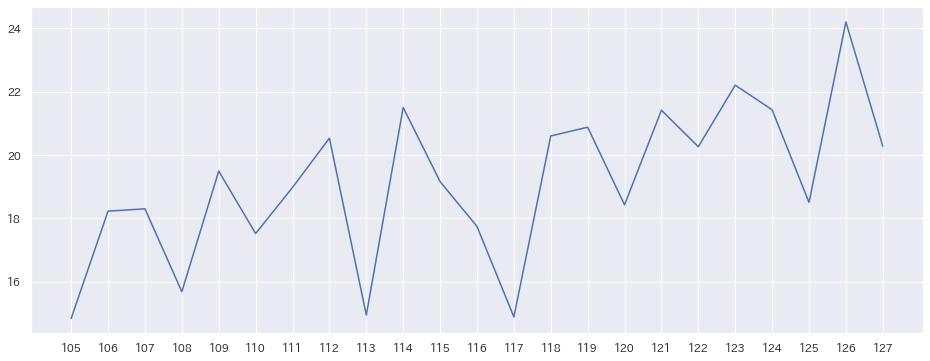

In [24]:
plt.figure(figsize=(16,6))
plt.plot(df['x'],df['y'])
plt.xticks(np.arange(105, 128, 1));

１ヶ月先までを予測

In [25]:
stan_model = """
data {
  int T;
  int T_new;
  real Y[T];
}

parameters {
  real mu[T];
  real<lower=0> s_mu;
  real<lower=0> s_Y;
}

model {
  for (t in 2:T){
    mu[t] ~ normal(mu[t-1], s_mu);
  }
  
  for (t in 1:T){
    Y[t] ~ normal(mu[t], s_Y);
  }
}

generated quantities {
  real mu_new;
  real Y_new[T+T_new];
  for (t in 1:T){
    Y_new[t] = normal_rng(mu[t], s_Y);
  }
  mu_new = normal_rng(mu[T], s_mu);
  Y_new[T+T_new] = normal_rng(mu_new, s_Y);
}

"""

In [26]:
# sm = pystan.StanModel(model_code=stan_model)
# stan_data = {"T":df.shape[0],"T_new":1, "Y":df["y"]}

In [27]:
# fit = sm.sampling(data = stan_data, iter=3000, warmup=1500, seed=123, chains=3)

In [ ]:
stan_data = {'T': df.shape[0], 'T_new': 1, 'Y': df['y'].values}
# stan_data = {'T': df.shape[0], 'T_new': 1, 'Y': df['y']}
sm = stan.build(stan_model, data=stan_data, random_seed=123)

In [ ]:
fit = sm.sample(num_chains=3, num_samples=3000)

In [30]:
# fit
df_tmp = fit.to_frame()
print(df_tmp.describe().T)

                count       mean        std           min        25%  \
parameters                                                             
lp__           9000.0 -31.589102  10.306713 -6.863473e+01 -38.713123   
accept_stat__  9000.0   0.869377   0.194731  1.112549e-26   0.847282   
stepsize__     9000.0   0.172247   0.011863  1.555970e-01   0.155597   
treedepth__    9000.0   4.570667   0.670116  1.000000e+00   4.000000   
n_leapfrog__   9000.0  32.067889  15.705286  3.000000e+00  15.000000   
divergent__    9000.0   0.000222   0.014906  0.000000e+00   0.000000   
energy__       9000.0  44.069601  10.933395  8.089224e+00  36.418257   
mu.1           9000.0  17.144222   1.317636  9.913705e+00  16.297958   
mu.2           9000.0  17.532113   1.093930  1.196102e+01  16.820265   
mu.3           9000.0  17.724462   1.013830  1.353076e+01  17.067098   
mu.4           9000.0  17.731814   1.025849  1.258980e+01  17.081594   
mu.5           9000.0  18.132241   0.974795  1.337936e+01  17.51

In [31]:
# fig = fit.plot()

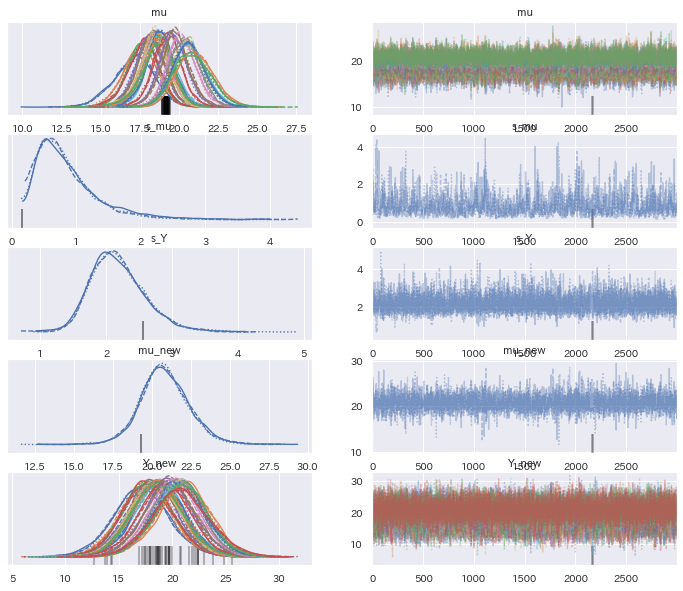

In [32]:
import arviz
arviz.plot_trace(fit);

In [33]:
# Y_new_arr = fit.extract("Y_new")["Y_new"]

Y_new_arr = fit["Y_new"].T

In [34]:
Y_new_arr

array([[16.25977418, 17.56382002, 19.11579627, ..., 24.70393761,
        20.43532254, 21.32674631],
       [13.76421363, 17.85528455, 18.40142077, ..., 24.01538056,
        25.56006514, 19.61285213],
       [16.66184025, 15.01812189, 20.00678304, ..., 24.16227175,
        22.54919006, 20.665463  ],
       ...,
       [17.03028432, 19.84914558, 21.04443726, ..., 20.47143733,
        20.44513847, 17.23753182],
       [14.06580088, 17.27288199, 18.26883385, ..., 19.1354428 ,
        21.78072797, 23.58473177],
       [18.34735053, 13.54795243, 20.21993958, ..., 22.93666096,
        24.48851696, 24.26995691]])

In [35]:
low_y50, high_y50 = mstats.mquantiles(Y_new_arr, [0.25, 0.75], axis=0)
low_y95, high_y95 = mstats.mquantiles(Y_new_arr, [0.025, 0.975], axis=0)

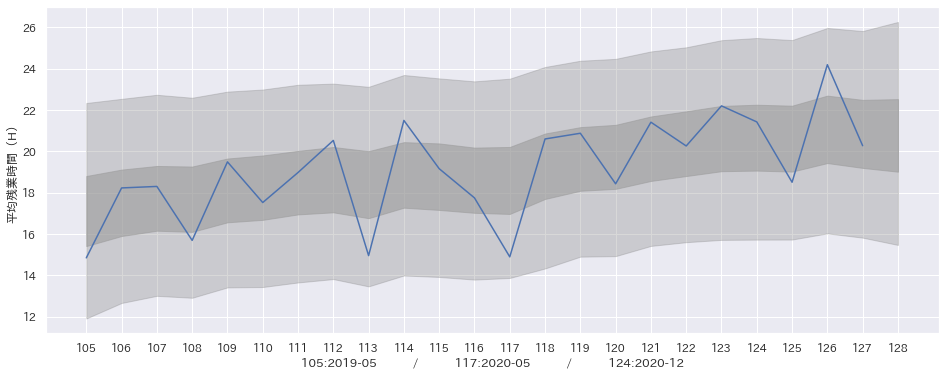

In [36]:
plt.figure(figsize=(16,6))
plt.plot(df["x"],df["y"])
x = df["x"].values
x = np.append(x, 128)
plt.fill_between(x, low_y50, high_y50, alpha=0.6, color="darkgray")
plt.fill_between(x, low_y95, high_y95, alpha=0.3, color="gray")
plt.xticks(np.arange(105, 129, 1))
plt.xlabel('105:2019-05　　　/　　　117:2020-05　　　/　　　124:2020-12')

plt.ylabel('平均残業時間（H）')
plt.show()
# plt.savefig(out_path + '残業推移予測（状態空間モデル）.pdf', dpi=300)

In [37]:
Y_new_arr[:,-1:].mean()

20.791119632501317

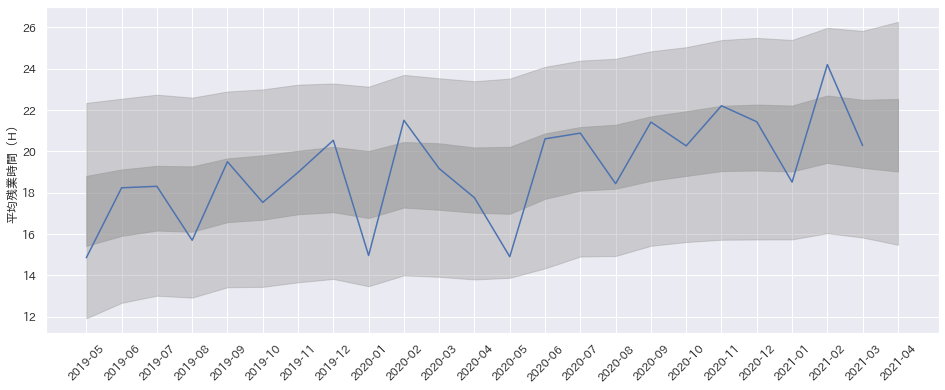

In [39]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df["x"],df["y"])
x = df["x"].values
x = np.append(x, 128)
ax.fill_between(x, low_y50, high_y50, alpha=0.6, color="darkgray")
ax.fill_between(x, low_y95, high_y95, alpha=0.3, color="gray")

ax.set_xticks(np.arange(105, 129, 1))
# plt.xlabel('105:2019-05　　　/　　　117:2020-05　　　/　　　124:2020-12')
ax.set_xticklabels(['2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
                 '2020-01','2020-02','2020-03','2020-04',
                 '2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12',
                 '2021-01','2021-02','2021-03','2021-04'])

ax.set_ylabel('平均残業時間（H）')

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)

# plt.show()
plt.savefig('残業推移予測（状態空間モデル）.pdf', dpi=300)